In [36]:
#Levitation height modelling analysis
#Last updated 17 April 2021.
#Author: Shreya Deshmukh, Stanford University.

#Runs as a jupyter notebook through anaconda (on python version 2.7)

#Import the following libraries
from os import listdir
from os.path import join
import numpy as np
import scipy.misc
from scipy import ndimage
from scipy import stats
from scipy.stats import moment, mode
import csv
import matplotlib.pyplot as plt
from PIL import Image
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.rc('font',family='Arial')

In [37]:
#Calculating predicted levitation height of a cell with input parameters

#Define medium variables (as an array)
#Medium magnetic susceptibility
Gd_vec_pre = range(0,11,1) #molar concentration of gadolinium (paramagnetic) ions
Gd_vec = [0.01*i for i in Gd_vec_pre] #unit conversion

#Medium density
Percoll_vec_pre = range(101,125,1) #density of Percoll solution used (rho_PBS at room temperature is 1013219.67213)
Percoll_vec = [0.01*i for i in Percoll_vec_pre] #unit conversion

#Define universal and device constants, display values to check results
g = 9.8 #in m*s^-2; acceleration of gravity
d = 0.001 #in m, height of channel (separation between magnets), in m (0.001 in our device)
chi_m_Gd = 3.34*10**(-7) #in m^3*mol^-1, molar magnetic susceptibility of gadolinium ions, calculated from its spin and Curie temperature
rho_Gd = 1.3 #density of the stock solution of gadobutrol injection, from its documentation
chi_factor = 4*math.pi #conversion factor for (unitless) magnetic susceptibility
chi_H2O = -9.04*10**(-6) #molar magnetic susceptibility of water at room temperature
B = 0.3 #in T, surface magnetic field strength for the NdFeB magnets we used, in T, or kg·s-2·A-1
p = 4*math.pi*10**(-7) #in T*m*A^-2, permeability of free space


In [38]:
#Define cell variables
chi_RBC = chi_H2O+ ((-0.18)*10**(-6)) #RBC (uninfected) magnetic susceptibility #chi_factor*(chi_H2O+
rho_RBC = 1.100*10**3 #1.125*10**6 #1.100*10**6 #RBC (uninfected) density

chi_ring = chi_H2O+ (0.82*10**(-6))  #infected RBC (ring) magnetic susceptibility #chi_factor*(chi_H2O+
rho_ring = 1.090*10**3 # #infected RBC (trophozoite) density

chi_troph = chi_H2O+ (0.91*10**(-6)) #infected RBC (trophozoite) magnetic susceptibility #chi_factor*(chi_H2O+
rho_troph = 1.079*10**3 #infected RBC (trophozoite) density

chi_schiz = chi_H2O+ (1.80*10**(-6)) #infected RBC (schizont) magnetic susceptibility
rho_schiz = 1.070*10**3 #1.09*10**6 # #infected RBC (schizont) density

In [43]:
#Example calculation with a single cell:

chi_cell = chi_RBC
rho_cell = rho_RBC

Gd = Gd_vec[3] #this vector is the range of paramagnetic ion concentrations evaluated
chi_medium = (Gd*chi_m_Gd) #dependent on Gd
delta_chi = chi_cell - chi_medium;
print delta_chi

Percoll = Percoll_vec[0] #this vector is the range of medium densities evaluated
rho_medium = ((Percoll*(1-Gd))+(rho_Gd*(Gd)))*10**3
delta_rho = rho_cell - rho_medium
print delta_rho

h_cell=((0.5*d)+((delta_rho*g*p*d**2)/(delta_chi*4*B**2)))*10**6

print h_cell

-9.23002e-06
81.3
198.684590449


In [44]:
#Next, calculate projeced heights over a range of medium parameters (density x magnetic susceptibility)

In [47]:
#Calculating predicted levitation height of a cell with varying medium parameters (as an array)
#performed with inputs for "RBC" (i.e. uninfected RBCs), but can be replaced with variables for other cell types

#Input variables and constants into equations and show results (select cell type here to generate values specific to that cell type or stage)
chi_cell = chi_RBC
rho_cell = rho_RBC

h_cell_arr = np.empty([len(Gd_vec),len(Percoll_vec)])

for i in range(0, len(Gd_vec)):
    Gd = Gd_vec[i] #this vector is the range of paramagnetic ion concentrations evaluated
    chi_medium = (Gd*chi_m_Gd) #dependent on Gd
    delta_chi = chi_cell - chi_medium;
    for j in range(0,len(Percoll_vec)):
        Percoll = Percoll_vec[j] #this vector is the range of medium densities evaluated
        rho_medium = ((Percoll*(1-Gd))+(rho_Gd*Gd))*10**3
        delta_rho = rho_cell - rho_medium
        h_cell_arr[i,j]=((0.5*d)+((delta_rho*g*p*d**2)/(delta_chi*4*B**2)))*10**6
        
h_cell_RBC = h_cell_arr

#print h_cell_RBC

In [48]:
#Calculating predicted levitation height of a cell with varying medium parameters (as an array)
#performed with inputs for ring-stage infected RBCs

#Input variables and constants into equations and show results (select cell type here to generate values specific to that cell type or stage)
chi_cell = chi_ring
rho_cell = rho_ring

h_cell_arr = np.empty([len(Gd_vec),len(Percoll_vec)])

for i in range(0, len(Gd_vec)):
    Gd = Gd_vec[i] #this vector is the range of paramagnetic ion concentrations evaluated
    chi_medium = (Gd*chi_m_Gd) #dependent on Gd
    delta_chi = chi_cell - chi_medium;
    for j in range(0,len(Percoll_vec)):
        Percoll = Percoll_vec[j] #this vector is the range of medium densities evaluated
        rho_medium = ((Percoll*(1-Gd))+(rho_Gd*Gd))*10**3
        delta_rho = rho_cell - rho_medium
        h_cell_arr[i,j]=((0.5*d)+((delta_rho*g*p*d**2)/(delta_chi*4*B**2)))*10**6
                  
h_cell_ring = h_cell_arr

#print h_cell_arr

In [49]:
#Calculating predicted levitation height of a cell with varying medium parameters (as an array)
#performed with inputs for trophozoite-stage infected RBCs

#Input variables and constants into equations and show results (select cell type here to generate values specific to that cell type or stage)
chi_cell = chi_troph
rho_cell = rho_troph

h_cell_arr = np.empty([len(Gd_vec),len(Percoll_vec)])

for i in range(0, len(Gd_vec)):
    Gd = Gd_vec[i] #this vector is the range of paramagnetic ion concentrations evaluated
    chi_medium = (Gd*chi_m_Gd)  #dependent on Gd
    delta_chi = chi_cell - chi_medium;
    for j in range(0,len(Percoll_vec)):
        Percoll = Percoll_vec[j] #this vector is the range of medium densities evaluated
        rho_medium = ((Percoll*(1-Gd))+(rho_Gd*Gd))*10**3
        delta_rho = rho_cell - rho_medium
        h_cell_arr[i,j]=((0.5*d)+((delta_rho*g*p*d**2)/(delta_chi*4*B**2)))*10**6
                     
h_cell_troph = h_cell_arr

#print h_cell_arr

In [50]:
#Calculating predicted levitation height of a cell with varying medium parameters (as an array)
#performed with inputs for schizont-stage infected RBCs

#Input variables and constants into equations and show results (select cell type here to generate values specific to that cell type or stage)
chi_cell = chi_schiz
rho_cell = rho_schiz

h_cell_arr = np.empty([len(Gd_vec),len(Percoll_vec)])

for i in range(0, len(Gd_vec)):
    Gd = Gd_vec[i] #this vector is the range of paramagnetic ion concentrations evaluated
    chi_medium = (Gd*chi_m_Gd) #- (chi_H2O) #dependent on Gd
    delta_chi = chi_cell - chi_medium;
    for j in range(0,len(Percoll_vec)):
        Percoll = Percoll_vec[j] #this vector is the range of medium densities evaluated
        rho_medium = ((Percoll*(1-Gd))+(rho_Gd*Gd))*10**3
        delta_rho = rho_cell - rho_medium
        h_cell_arr[i,j]=((0.5*d)+((delta_rho*g*p*d**2)/(delta_chi*4*B**2)))*10**6
           
h_cell_schiz = h_cell_arr

#print h_cell_arr

In [51]:
g = 3 #to refer to projected height at 30 mM [Gd^3+] -the optimal concentration
P = 11 #to refer to medium density of 1.110 g/mL -the optimal concentration

#Print results of cell height projections and separation therein
print 'Low density:'
print 'stage-based predicted heights:', h_cell_RBC[g,0],h_cell_ring[g,0],h_cell_troph[g,0],h_cell_schiz[g,0]
print 'RBC-ring separation:', h_cell_ring[g,0]-h_cell_RBC[g,0]

print 'High density:'
print 'stage-based predicted heights:', h_cell_RBC[g,P],h_cell_ring[g,P],h_cell_troph[g,P],h_cell_schiz[g,P]
print 'RBC-ring separation:', h_cell_ring[g,P]-h_cell_RBC[g,P]

Low density:
stage-based predicted heights: 198.68459044856598 203.63829941153986 246.5891071094345 257.9463703141148
RBC-ring separation: 4.953708962973877
High density:
stage-based predicted heights: 594.1379016310747 647.1417138966542 694.9961099522752 761.3990464833917
RBC-ring separation: 53.00381226557954


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

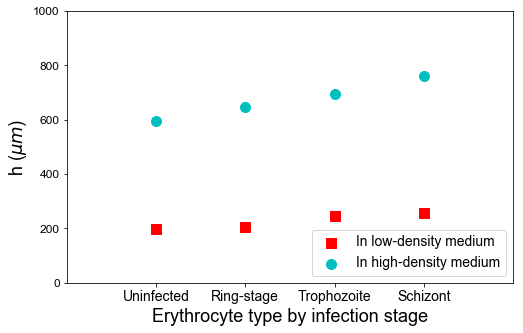

In [53]:
#Plot theoretical levitation heights (calculated in MATLAB code, based on known or estimated biophysical values from literature: cell density and cell magnetic susceptibility)
plt.figure(1)
plt.figure(figsize=(8,5))
plt.axis([0, 5, 0,1000])
x = [1,2,3,4] #4 cell stages
g = 3 #to refer to projected height at 30 mM [Gd^3+]
P = 11 #to refer to medium density of 1.110 g/mL

#Projected heights of each cell type in the low-density case
y_lowrho = [h_cell_RBC[g,0],h_cell_ring[g,0],h_cell_troph[g,0],h_cell_schiz[g,0]]
plt.scatter(x,y_lowrho, c = 'r', s=100, marker = 's', label = "In low-density medium")
plt.hold(True)

#Projected heights of each cell type in the low-density case
max_rho = h_cell_RBC.shape[1]
y_highrho = [h_cell_RBC[g,P],h_cell_ring[g,P],h_cell_troph[g,P],h_cell_schiz[g,P]]
plt.scatter(x,y_highrho, c = 'c', s=100, marker = 'o', label = "In high-density medium")

#Plot settings
plt.xticks(x, ('Uninfected', 'Ring-stage', 'Trophozoite', 'Schizont'), fontsize=14, rotation=0)
plt.yticks(fontsize = 12)
plt.xlabel('Erythrocyte type by infection stage', fontsize=18)
plt.ylabel('h (${\mu}m$)', fontsize=18)
plt.legend(loc='lower right', fontsize=14)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


<Figure size 432x288 with 0 Axes>

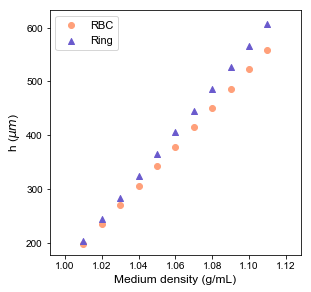

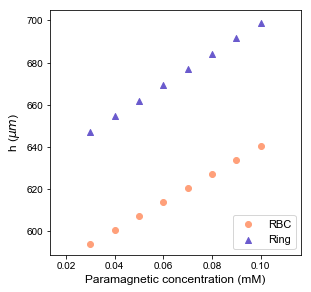

In [54]:
#Plot projected heights of uninfected RBCs and ring-stage infected RBCs across a range of medium conditions:
g = 3
P = 11

#Varying medium density
plt.figure(2)
plt.figure(figsize=(4.5,4.5))
x = Percoll_vec[0:P] #0.01*np.arange(101,125)

#Calling in projected height results generated above
y_RBC = h_cell_RBC[g,0:P]
y_ring = h_cell_ring[g,0:P]
y = y_ring - y_RBC

plt.scatter(x,y_RBC, label = "RBC", c = 'lightsalmon') #, c = 'bl', s=100, marker = 'o')
plt.hold(True)
plt.scatter(x,y_ring, label = "Ring", c = 'slateblue', marker = '^')
#plt.axis([1.00, 1.12, 450, 700], fontsize=18)
plt.xlabel('Medium density (g/mL)', fontsize=12)
plt.ylabel('h (${\mu}m$)', fontsize=12)
plt.legend(loc='upper left', fontsize=11)

#Varying medium magnetic susceptibility by concentration of paramagnetic ions
plt.figure(3)
plt.figure(figsize=(4.5,4.5))
X = Gd_vec[g::]
P=11 

max_chi = h_cell_RBC.shape[0]
y_RBCdense = h_cell_RBC[g::,P] #max_chi-1]
y_ringdense = h_cell_ring[g::,P] #max_chi-1]
ydense = y_ringdense - y_RBCdense
plt.scatter(X,y_RBCdense, label = "RBC", c = 'lightsalmon') #, c = 'bl', s=100, marker = 'o')
plt.hold(True)
plt.scatter(X,y_ringdense, label = "Ring", c = 'slateblue', marker = '^')
#plt.axis([0.02, 0.11, 450, 700], fontsize=18)
plt.xlabel('Paramagnetic concentration (mM)', fontsize=12) #(x$10^4$)
plt.ylabel('h (${\mu}m$)', fontsize=12)
plt.legend(loc='lower right', fontsize=11)

In [55]:
print "separation across medium density:", y
print "separation across medium mag. susc.:", ydense

separation across medium density: [ 4.95370896  9.32190017 13.69009138 18.05828259 22.4264738  26.79466501
 31.16285622 35.53104743 39.89923864 44.26742985 48.63562106]
separation across medium mag. susc.: [53.00381227 53.7881447  54.57125849 55.35315576 56.1338386  56.91330913
 57.69156945 58.46862164]


In [56]:
g = 3 #refers to 30 mM [Gd3+], the lowest conc. of paramagnetic ions
P = 11 #refers to a medium density of 1.120 g/mL, the highest density we could physically achieve with isotonic Percoll suspension. 

Ring-stage parasites are enriched by a factor of 2.56666666667 above 201.16144493.


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


<Figure size 432x288 with 0 Axes>

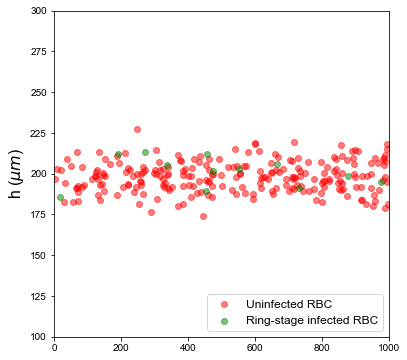

In [57]:
#Simulating typical distribution of cells in an infected (mixed) population
#Low density case

#Cell projected height (mean of the distribution)
RBC30PBS = h_cell_RBC[g,0]
ring30PBS = h_cell_ring[g,0]

RBCsize = 250 #2500 #size of cell population, vary this to simulate cell dilution variations
RBCscale = 10 #standard deviation, or a measure of cell spread (/how tight the levitation band is)
parasitemia = 0.05 #typical parasitemia in 3D7 cultures (i.e. percentage of all cells that are parasitized)
ringsize = np.int(RBCsize*parasitemia) #size of cell population, for rings, as a percentage of the total RBC population
ringscale = 12 #standard deviation, or a measure of cell spread (/how tight the levitation band is)

#Generate RBC distribution

#Gaussian of given number of points, normally distributed around the given mean, with the given standard deviation
RBC = np.random.normal(RBC30PBS, RBCscale, RBCsize-ringsize)

#Plot the distribution
plt.figure(4)
plt.figure(figsize=(6,6))
plt.scatter(np.random.randint(0,1000,(RBCsize-ringsize)),RBC, c='r', alpha=0.5, label = "Uninfected RBC")

#Generate ring distribution
ring = np.random.normal(ring30PBS, ringscale, ringsize)

#Overlay this on the RBC plot
plt.hold(True)
plt.scatter(np.random.randint(0,1000,ringsize),ring,c='g', alpha=0.5, label = "Ring-stage infected RBC")
plt.ylim([100, 300])
plt.xlim([0, 1000])
plt.ylabel('h (${\mu}m$)', fontsize=16)
#plt.xlabel('Channel z (${\mu}m$)', fontsize=18)
plt.legend(loc='lower right', fontsize=12)

#Quantify enrichment of parasites above main band:
threshold_low = (RBC30PBS+ring30PBS)/2

RBCabove = np.count_nonzero(RBC >= threshold_low)
ringabove = np.count_nonzero(ring >= threshold_low)
#print RBCabove
#print ringabove

RBCbelow = np.count_nonzero(RBC < threshold_low)
ringbelow = np.count_nonzero(ring < threshold_low)
#print RBCbelow
#print ringbelow

p_above = np.float(ringabove)/np.float(RBCabove)
#print p_above
p_below = np.float(ringbelow)/np.float(RBCbelow)
#print p_below

enrich_low = np.float(p_above)/np.float(p_below)

print "Ring-stage parasites are enriched by a factor of {} above {}.".format(enrich_low, threshold_low)

Ring-stage parasites are enriched by a factor of 2844.0 above 620.639807764.


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


<Figure size 432x288 with 0 Axes>

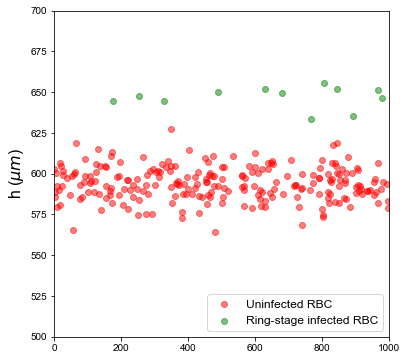

In [58]:
#Simulating typical distribution of cells in an infected (mixed) population
#High density case

#Cell projected height (mean of the distribution)
RBC30Perc = h_cell_RBC[g,P]
ring30Perc = h_cell_ring[g,P]

RBCsize = 250 #2500 #size of cell population, vary this to simulate cell dilution variations
RBCscale = 10 #standard deviation, or a measure of cell spread (/how tight the levitation band is)
parasitemia = 0.05 #typical parasitemia in 3D7 cultures (i.e. percentage of all cells that are parasitized)
ringsize = np.int(RBCsize*parasitemia) #size of cell population, for rings, as a percentage of the total RBC population
ringscale = 12 #standard deviation, or a measure of cell spread (/how tight the levitation band is)

#Generate RBC distribution

#Gaussian of given number of points, normally distributed around the given mean, with the given standard deviation
RBC = np.random.normal(RBC30Perc, RBCscale, RBCsize-ringsize)

#Plot the distribution
plt.figure(4)
plt.figure(figsize=(6,6))
plt.scatter(np.random.randint(0,1000,RBCsize-ringsize),RBC, c='r', alpha=0.5, label = "Uninfected RBC") #,\ mean\ height = 357{\mu}m$")

#Generate ring distribution
ring = np.random.normal(ring30Perc, ringscale, ringsize)

#Overlay this on the RBC plot
plt.hold(True)
plt.scatter(np.random.randint(0,1000,ringsize),ring,c='g', alpha=0.5, label = "Ring-stage infected RBC") #,\ mean\ height = 361{\mu}m$")
plt.ylim([500, 700])
plt.xlim([0, 1000])
plt.ylabel('h (${\mu}m$)', fontsize=16)
#plt.xlabel('Channel z (${\mu}m$)', fontsize=18)
plt.legend(loc='lower right', fontsize=12)

#Quantify enrichment of parasites above main band:
threshold_high = (RBC30Perc+ring30Perc)/2

RBCabove = np.count_nonzero(RBC >= threshold_high)
if RBCabove ==0:
    RBCabove = 1 #to prevent division by zero, set # of RBCs to 1 if there are none present
ringabove = np.count_nonzero(ring >= threshold_high)
#print RBCabove
#print ringabove

RBCbelow = np.count_nonzero(RBC < threshold_high)
ringbelow = np.count_nonzero(ring < threshold_high)
if ringbelow ==0:
    ringbelow = 1 #to prevent division by zero, set # of rings to 1 if there are none present
#print RBCbelow
#print ringbelow

p_above = np.float(ringabove)/np.float(RBCabove)
#print p_above
p_below = np.float(ringbelow)/np.float(RBCbelow)
#print p_below

enrich_high = np.float(p_above)/np.float(p_below)

print "Ring-stage parasites are enriched by a factor of {} above {}.".format(enrich_high, threshold_high)

In [59]:
print threshold_low, threshold_high

201.16144493005294 620.6398077638644


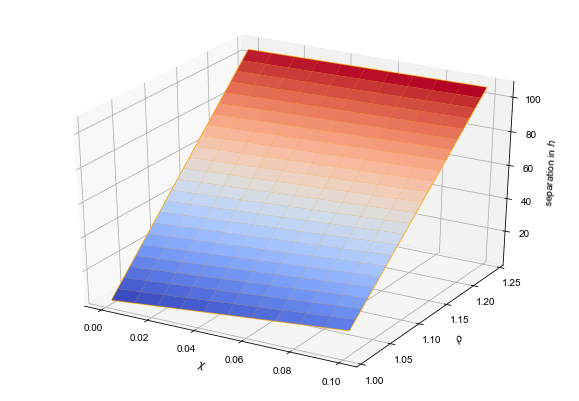

In [60]:
#3D surface plot of modelled levitation heights
#Separation between rings and uRBCs

x = np.array([Gd_vec])
y = np.array([Percoll_vec])
x, y = np.meshgrid(x, y)

z = np.transpose(h_cell_ring - h_cell_RBC)
#z = h_cell_ring - h_cell_RBC

fig = plt.figure(figsize=(10,7)) 
ax = plt.axes(projection="3d")

ax.plot_wireframe(x, y, z, color='orange')
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\rho$')
ax.set_zlabel('separation in $h$')

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')

plt.show()

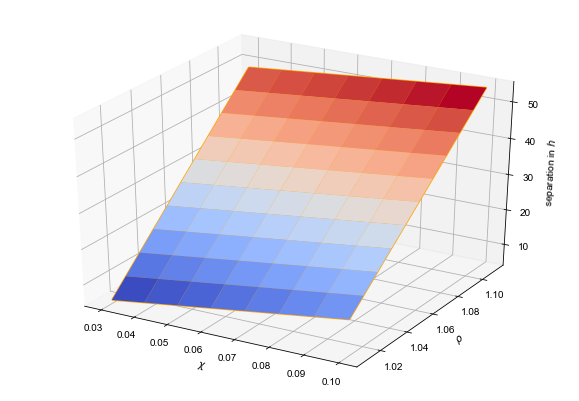

In [61]:
#3D surface plot of modelled levitation heights
#Separation between rings and uRBCs
#Only physically relevant range of medium parameters

x = np.array([Gd_vec[g::]])
y = np.array([Percoll_vec[0:P]])
x, y = np.meshgrid(x, y)

z = np.transpose(h_cell_ring[g::,0:P] - h_cell_RBC[g::,0:P])
#z = h_cell_ring - h_cell_RBC

fig = plt.figure(figsize=(10,7)) 
ax = plt.axes(projection="3d")

ax.plot_wireframe(x, y, z, color='orange')
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\rho$')
ax.set_zlabel('separation in $h$')

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')

plt.show()

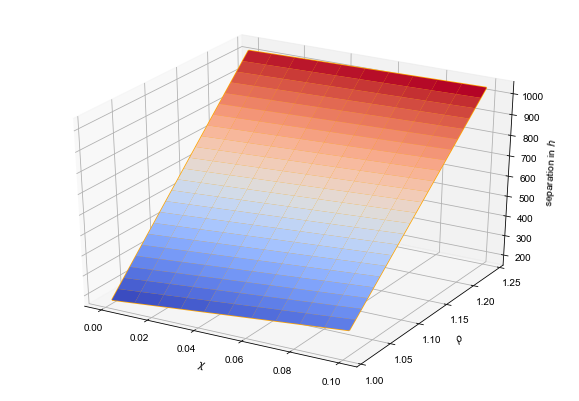

In [62]:
#3D surface plot of modelled levitation heights
#uRBC heights

x = np.array([Gd_vec])
y = np.array([Percoll_vec])
x, y = np.meshgrid(x, y)

z = np.transpose(h_cell_RBC)
#z = h_cell_ring - h_cell_RBC

fig = plt.figure(figsize=(10,7)) 
ax = plt.axes(projection="3d")

ax.plot_wireframe(x, y, z, color='orange')
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\rho$')
ax.set_zlabel('separation in $h$')

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')

plt.show()

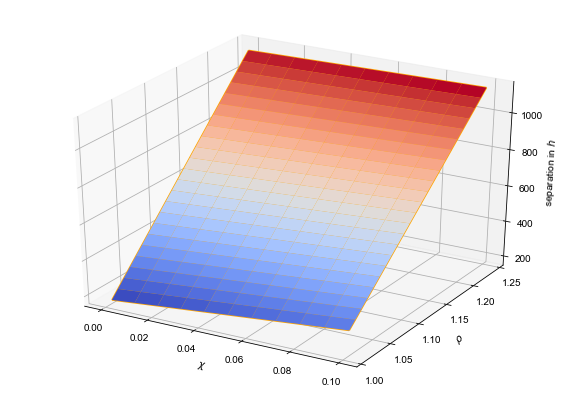

In [63]:
#3D surface plot of modelled levitation heights
#ring-RBC heights

x = np.array([Gd_vec])
y = np.array([Percoll_vec])
x, y = np.meshgrid(x, y)

z = np.transpose(h_cell_ring)
#z = h_cell_ring - h_cell_RBC

fig = plt.figure(figsize=(10,7)) 
ax = plt.axes(projection="3d")

ax.plot_wireframe(x, y, z, color='orange')
ax.set_xlabel('$\\chi$')
ax.set_ylabel('$\\rho$')
ax.set_zlabel('separation in $h$')

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')

plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


Text(0,0.5,'h (${\\mu}m$)')

<Figure size 432x288 with 0 Axes>

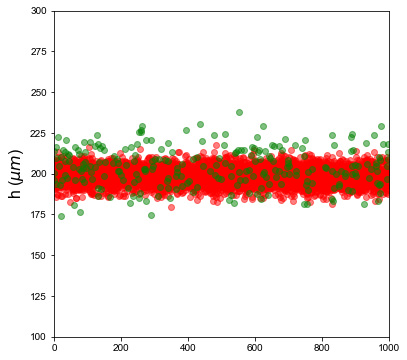

In [64]:
#Simulating typical distribution of cells in an infected (mixed) population
#Effect of cell dilution
#Low density case

#Cell projected height (mean of the distribution)
RBC30PBS = h_cell_RBC[g,0]
ring30PBS = h_cell_ring[g,0]

#Change 'RBCsize' variable below to simulate the effect of changing cell dilution here
RBCsize = 5000 #size of cell population, vary this to simulate cell dilution variations
RBCscale = 5 #standard deviation, or a measure of cell spread (/how tight the levitation band is)
parasitemia = 0.05 #typical parasitemia in 3D7 cultures (i.e. percentage of all cells that are parasitized)
ringsize = np.int(RBCsize*parasitemia) #size of cell population, for rings, as a percentage of the total RBC population
ringscale = 12 #standard deviation, or a measure of cell spread (/how tight the levitation band is)

#Generate RBC distribution

#Gaussian of given number of points, normally distributed around the given mean, with the given standard deviation
RBC = np.random.normal(RBC30PBS, RBCscale, RBCsize-ringsize)

#Plot the distribution
plt.figure(4)
plt.figure(figsize=(6,6))
plt.scatter(np.random.randint(0,1000,(RBCsize-ringsize)),RBC, c='r', alpha=0.5, label = "Uninfected RBC")

#Generate ring distribution
ring = np.random.normal(ring30PBS, ringscale, ringsize)

#Overlay this on the RBC plot
plt.hold(True)
plt.scatter(np.random.randint(0,1000,ringsize),ring,c='g', alpha=0.5, label = "Ring-stage infected RBC")
plt.ylim([100, 300])
plt.xlim([0, 1000])
plt.ylabel('h (${\mu}m$)', fontsize=16)
#plt.xlabel('Channel z (${\mu}m$)', fontsize=18)
#plt.legend(loc='lower right', fontsize=12)
